<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 4</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Stipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Stipe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

movies = pd.read_csv('blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *Main_Genre*: primarni žanr filma
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: duljina filma u minutama
- *rank_in_year*: rank među 10 najboljih filmova objavljenih te godine
- *rating*: ocjena publike
- *studio*: studio koji je producirao film
- *title*: naslov filma
- *worldwide_gross*: ukupni svjetski prihod u dolarima
- *year*: godina izdanja


## Vizualizacija jedne varijable

- Prvo ćemo vidjeti kako vizualizirati jednu varijablu koristeći biblioteku matplotlib. Usredotočimo se na stupac "Worldwide gross revenue" datafremea i pregledajmo distribuciju pomoću histograma i boxplota.
- Primijetite korištenje plt.xlabel(), plt.ylabel(), plt.title() - svaka vizualizacija treba imati označenu os i naslov!
- plt.hist() uzima nekoliko važnih argumenata: bins - broj binova i range - raspon vrijednosti razmatranih u histogramu

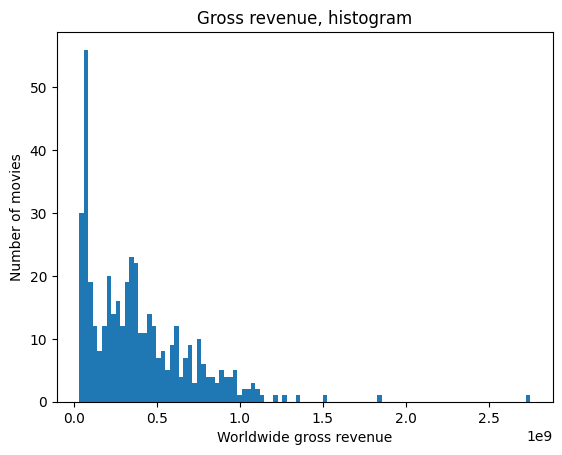

In [6]:
# plt.hist(movies['worldwide_gross'].values)
plt.hist(movies['worldwide_gross'].values, bins=100) # bin is the number of bars

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');


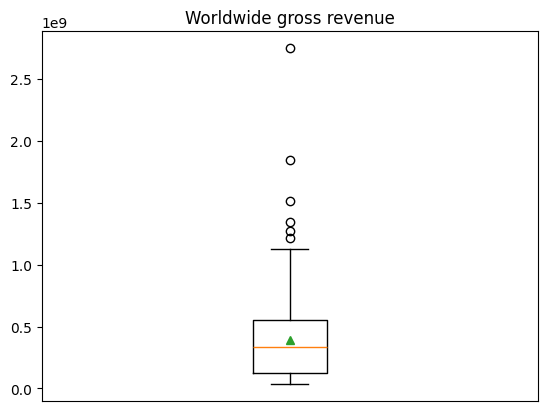

In [7]:
plt.boxplot(movies['worldwide_gross'], showmeans=True) # options for boxplot are showmeans, showfliers, showbox, showcaps, showbox, showfliers, showcaps, show.
plt.xticks([])
plt.title('Worldwide gross revenue');

## Vizualizacija dviju kontinuiranih varijabli

- Hoće li filmski hitovi s višom gledanošću ostvariti više prihoda!
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
90,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2.749064e+09,2009
210,Romance,Drama,NaN,7.7,194,1,PG-13,Paramount Pictures,Titanic,1.843201e+09,1997
60,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1.518595e+09,2012


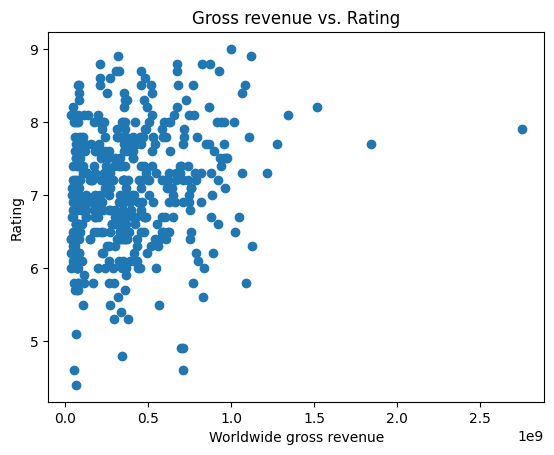

In [8]:
# scatter
plt.scatter(movies["worldwide_gross"], movies["imdb_rating"])
plt.xlabel('Worldwide gross revenue')
plt.ylabel('Rating')
plt.title('Gross revenue vs. Rating');
# print the highiest grossing 3 movies
movies.sort_values(by='worldwide_gross', ascending=False).head(3)



- Pokušat ćemo markere učiniti manjim određivanjem malog parametra veličine "s".

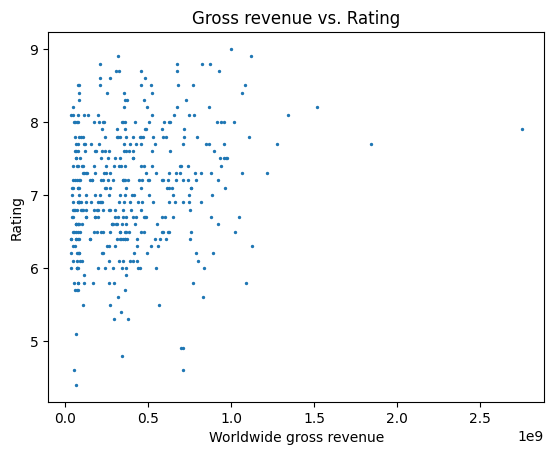

In [9]:
# scatter sa s=2
plt.scatter(movies["worldwide_gross"], movies["imdb_rating"], s=2)
plt.xlabel('Worldwide gross revenue')
plt.ylabel('Rating')
plt.title('Gross revenue vs. Rating');

Scatterplot nisu korisni kada je broj točaka vrlo velik jer ih postaje teško protumačiti. Seaborn nudi mnoge alternativne učinkovite načine vizualizacije.

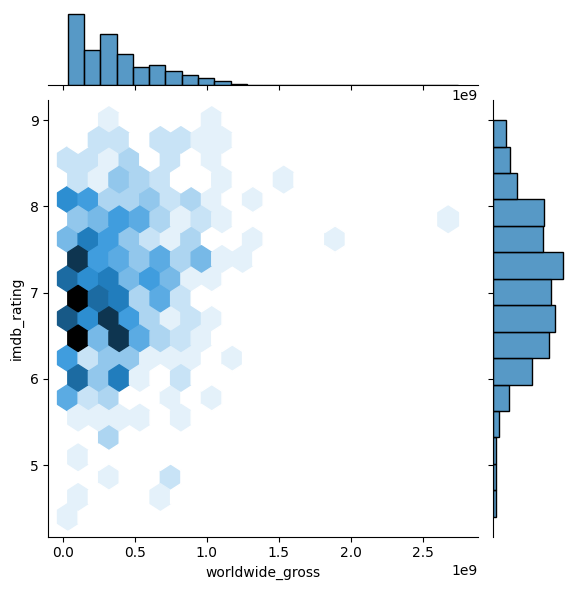

In [10]:
# jointplot sa kind="hex"
sns.jointplot(x="worldwide_gross", y="imdb_rating", data=movies, kind="hex")



C:\Users\Stipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:198: RuntimeWarning: invalid value encountered in divide
  normalized_values = np.cumsum(sorted_values) / values.sum()


ValueError: Contour levels must be increasing

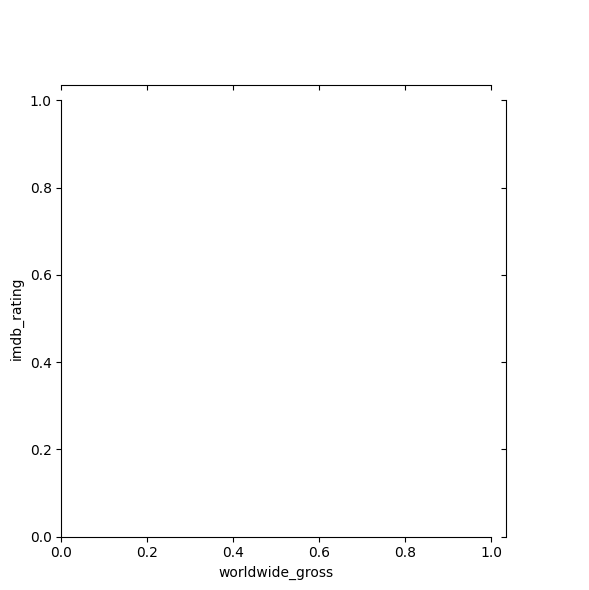

In [13]:
# jointplot sa kind="kde"
sns.jointplot(data = movies, x="worldwide_gross", y="imdb_rating", kind="kde")

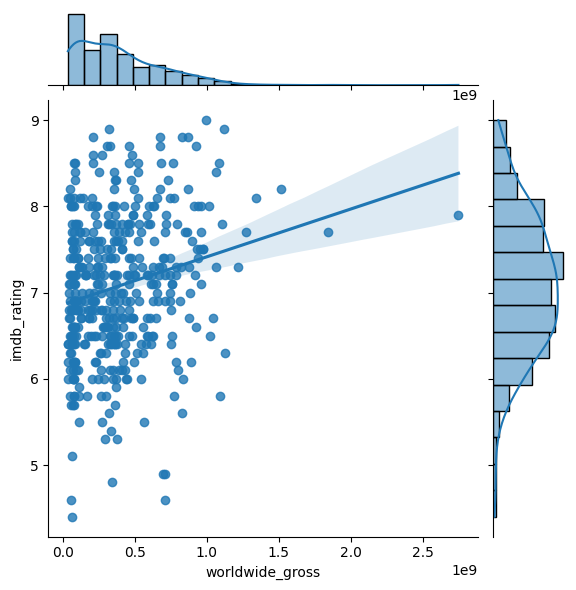

In [12]:
# jointplot sa kind="reg"
sns.jointplot(data = movies, x="worldwide_gross", y="imdb_rating", kind="reg")

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo pet najzastupljenijih žanrova i ispitajmo prihode
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

Main_Genre
Thriller              63
Comedy                55
Fantasy               54
Sci-Fi                50
Romance               48
Action                30
Drama                 30
Animation             22
Crime                 17
Family                16
Adventure & Action    13
War                   10
Music                  9
Horror                 8
Sport                  7
History                5
Name: count, dtype: int64


<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

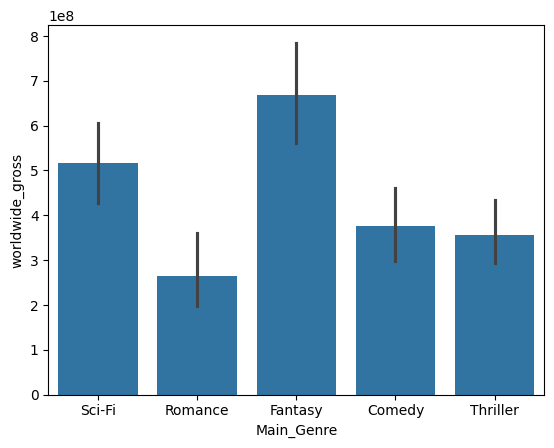

In [26]:
# barplot
print(movies["Main_Genre"].value_counts())
#Thriller     Comedy      Fantasy         Sci-Fi    Romance 
topmovies = movies.loc[movies["Main_Genre"].isin(["Thriller", "Comedy", "Fantasy", "Sci-Fi", "Romance"])]
sns.barplot(data = topmovies, x="Main_Genre", y="worldwide_gross") 


<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

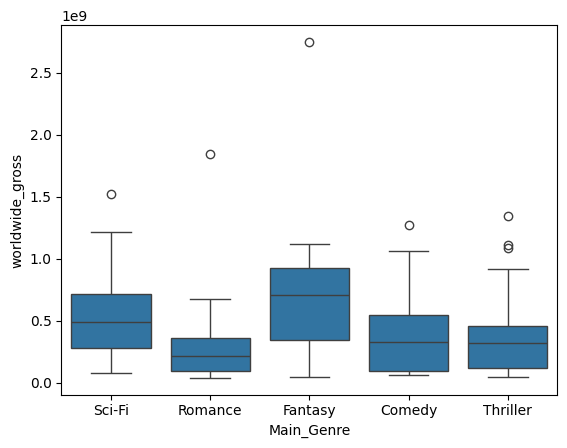

In [28]:
# boxplot
sns.boxplot(data = topmovies, x="Main_Genre", y="worldwide_gross")

<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

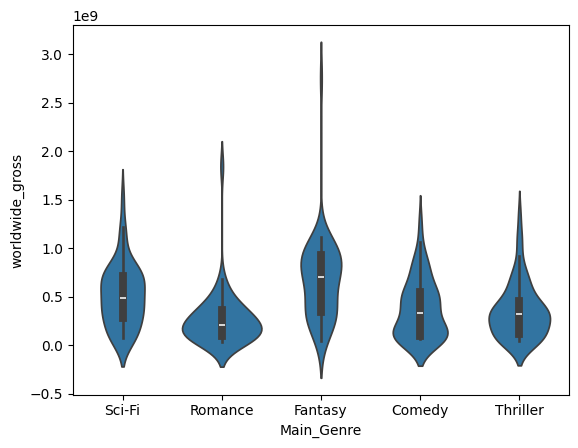

In [29]:
# violinplot
sns.violinplot(data = topmovies, x="Main_Genre", y="worldwide_gross")

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedeće dvije vježbe dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Kreiranje panela

- Želimo razumjeti koliko dugo traju blockbusteri u različitim žanrovima. Kada radite s velikim brojem kategorija (imamo 16 žanrova u skupu podataka o filmovima), vizualizacije se lako zatrpaju i postaje korisno izraditi ploče s malim subplotovima.

- Napravite panel 4x4 za 16 žanrova. U svakom subplotu prikažite histogram s distribucijom duljina filma za različite kategorije.

- Savjeti: koristite Matplotlib funkciju subplots

- Kojim žanrovima pripadaju i najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

In [31]:
# Izračunaj statistiku po žanrovima
movies.groupby("Main_Genre").describe()


imdb_rating                                               \
                         count      mean       std  min    25%   50%    75%   
Main_Genre                                                                    
Action                    30.0  7.296667  0.572643  6.1  7.000  7.40  7.775   
Adventure & Action        13.0  7.438462  0.883684  6.2  6.700  7.30  8.300   
Animation                 22.0  7.345455  0.675931  6.3  6.750  7.40  7.950   
Comedy                    55.0  6.938182  0.760237  5.5  6.350  6.90  7.450   
Crime                     17.0  6.782353  0.767492  5.1  6.400  6.80  7.600   
Drama                     30.0  7.303333  0.767658  6.0  6.650  7.25  7.800   
Family                    16.0  6.631250  0.841204  4.6  6.200  6.65  7.250   
Fantasy                   54.0  6.988889  1.030601  4.6  6.500  7.10  7.675   
History                    5.0  7.580000  0.846759  6.7  7.000  7.60  7.700   
Horror                     8.0  6.875000  0.738241  5.8  6.425  6.85  7.400   
Music                      9.0  6.822222  0.771002  5.7  6.200  7.00  7.200   
Romance                   48.0  6.862500  0.808630  4.4  6.375  6.90  7.325   
Sci-Fi                    50.0  7.186000  0.886868  5.5  6.525  7.20  7.875   
Sport                      7.0  7.028571  0.531395  6.5  6.700  6.90  7.150   
Thriller                  63.0  7.104762  0.716944  5.3  6.600  7.10  7.600   
War                       10.0  7.600000  0.802773  6.0  7.225  7.60  8.175   

                        length              ... worldwide_gross                \
                    max  count        mean  ...             75%           max   
Main_Genre                                  ...                                 
Action              8.5   30.0  130.566667  ...    4.157179e+08  9.366622e+08   
Adventure & Action  8.8   13.0  127.153846  ...    7.866360e+08  8.908716e+08   
Animation           8.4   22.0   98.227273  ...    6.295084e+08  9.707619e+08   
Comedy              8.4   55.0   99.400000  ...    5.462665e+08  1.274219e+09   
Crime               8.0   17.0  115.235294  ...    3.618324e+08  5.240287e+08   
Drama               9.0   30.0  122.900000  ...    4.282763e+08  9.970000e+08   
Family              7.8   16.0  111.125000  ...    3.337529e+08  4.766847e+08   
Fantasy             8.9   54.0  128.907407  ...    9.257949e+08  2.749064e+09   
History             8.9    5.0  129.600000  ...    3.534713e+08  4.567590e+08   
Horror              8.0    8.0  119.875000  ...    1.686610e+08  3.274817e+08   
Music               8.1    9.0  116.888889  ...    2.578501e+08  5.040142e+08   
Romance             8.8   48.0  118.187500  ...    3.581949e+08  1.843201e+09   
Sci-Fi              8.8   50.0  129.580000  ...    7.135024e+08  1.518595e+09   
Sport               8.1    7.0  106.285714  ...    1.206910e+08  1.278737e+08   
Thriller            8.7   63.0  124.587302  ...    4.575305e+08  1.341511e+09   
War                 8.6   10.0  139.700000  ...    1.553839e+08  4.818409e+08   

                    year                                                   \
                   count         mean        std     min      25%     50%   
Main_Genre                                                                  
Action              30.0  2013.833333   8.670534  1984.0  2015.00  2016.5   
Adventure & Action  13.0  1998.153846  11.407937  1980.0  1989.00  2004.0   
Animation           22.0  2010.863636   4.833371  2000.0  2008.00  2010.0   
Comedy              55.0  1995.672727  11.601492  1978.0  1985.00  1997.0   
Crime               17.0  1989.823529  10.315251  1976.0  1980.00  1988.0   
Drama               30.0  1990.133333   9.287490  1975.0  1983.00  1990.5   
Family              16.0  1988.812500   8.673475  1975.0  1983.50  1989.5   
Fantasy             54.0  2001.833333   9.756952  1977.0  1995.75  2003.0   
History              5.0  1988.600000  12.095454  1976.0  1976.00  1993.0   
Horror               8.0  1986.500000  13.103980  197

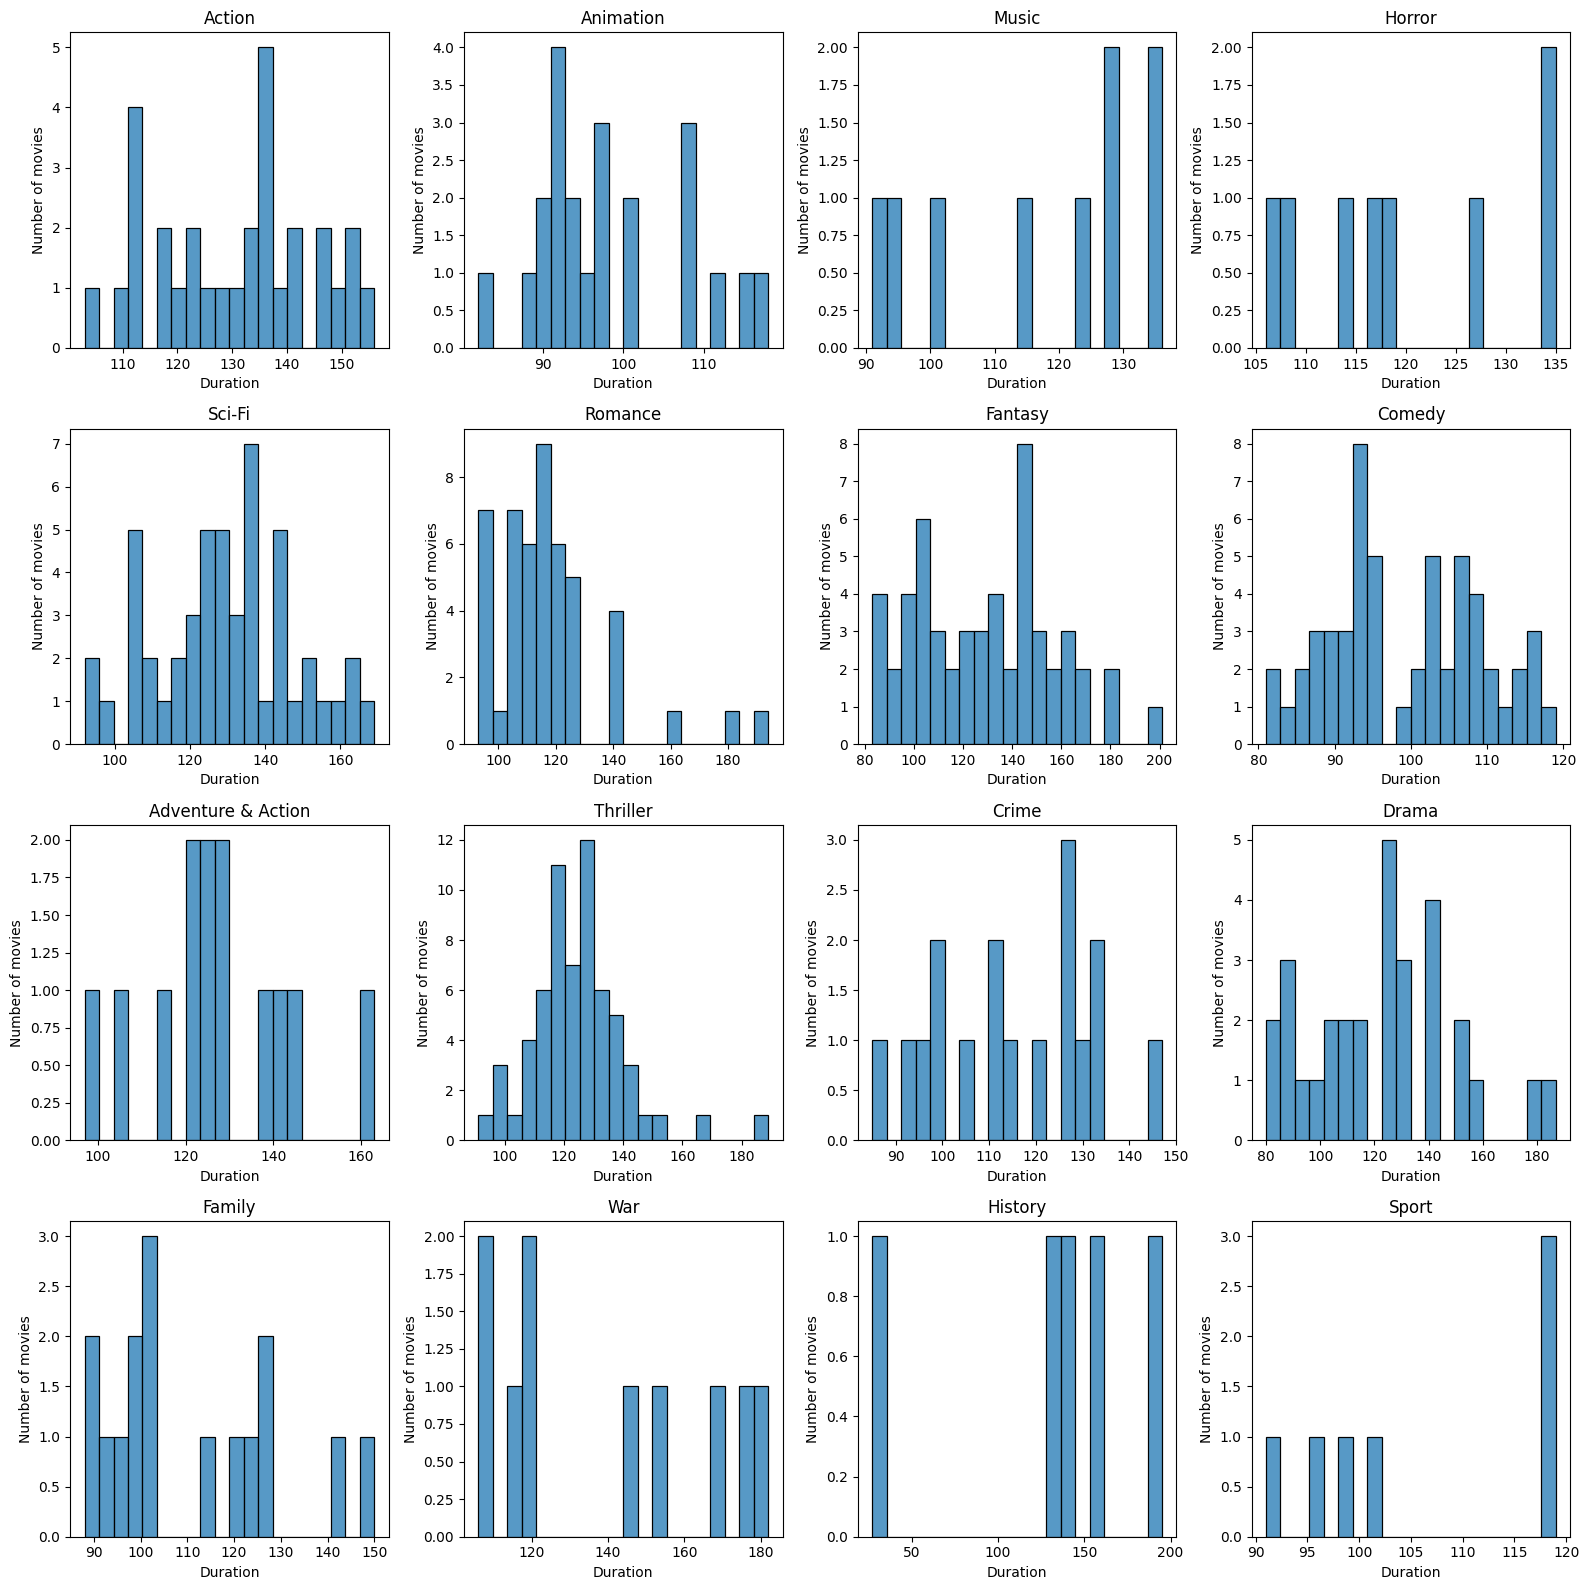

In [36]:
# Kreirajte plot sa 4x4 panela
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
#U svakom subplotu prikažite histogram s distribucijom duljina filma za različite kategorije.
for i, genre in enumerate(movies["Main_Genre"].unique()):
    sns.histplot(data=movies.loc[movies["Main_Genre"] == genre], x="length", ax=axes[i//4, i%4], bins=20)
    axes[i//4, i%4].set_title(genre)
    axes[i//4, i%4].set_xlabel("Duration")
    axes[i//4, i%4].set_ylabel("Number of movies")
plt.tight_layout()



## 2.2 Heatmape

- Koji studiji rade blockbustere u kojem žanru?

- Ima mnogo studija i mnogo žanrova. Kada radite s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s detaljnim dijagramom (kao što je barplot ili boxplot). Postaje korisno predstaviti svaki stratum jednim brojem, označenim bojom na toplinskoj karti. Takve su vizualizacije korisne za brzo razumijevanje podataka.

- Vizualizirajte broj blockbustera koje je napravio svaki studio, svakog žanra. U nastavku ćete pronaći grubu skicu. Savjet: koristite funkciju Seaborn heatmap.

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokušajte razumjeti kakav je odnos između žanrova razumijevanjem obrazaca supojavljivanja između glavnog i sekundarnog žanra. Koliki je prosječni prihod za filmove s različitim kombinacijama glavnog i drugog žanra?

- Trebali biste moći odgovoriti na sljedeća pitanja iz dvije vizualizacije: U koje žanrove spada većina filmova koje snima studio Warner Bros? Koji je najuspješniji žanr filmskih filmova Walta Disneya? Koji je studio napravio najveći broj ljubavnih blockbustera? Koja kombinacija žanrova donosi najveći prihod?


<Axes: xlabel='studio', ylabel='Main_Genre'>

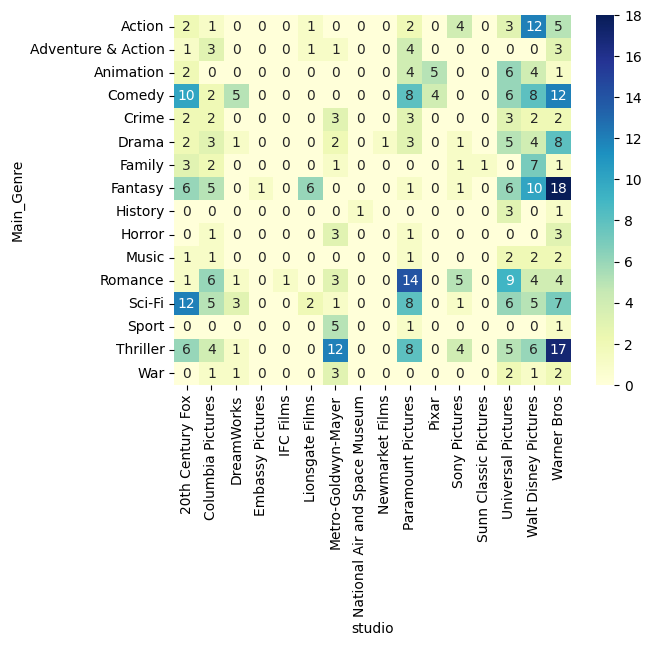

In [49]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
pd.crosstab(movies["Main_Genre"], movies["studio"])
sns.heatmap(pd.crosstab(movies["Main_Genre"], movies["studio"]), annot=True, fmt="d", cmap="YlGnBu") #annt is annotation, fmt is format, cmap is color map


C:\Users\Stipe\AppData\Local\Temp\ipykernel_24140\333188026.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp = pd.crosstab(movies["Main_Genre"], movies["Genre_2"], movies["worldwide_gross"], aggfunc=sum)


<Axes: xlabel='Genre_2', ylabel='Main_Genre'>

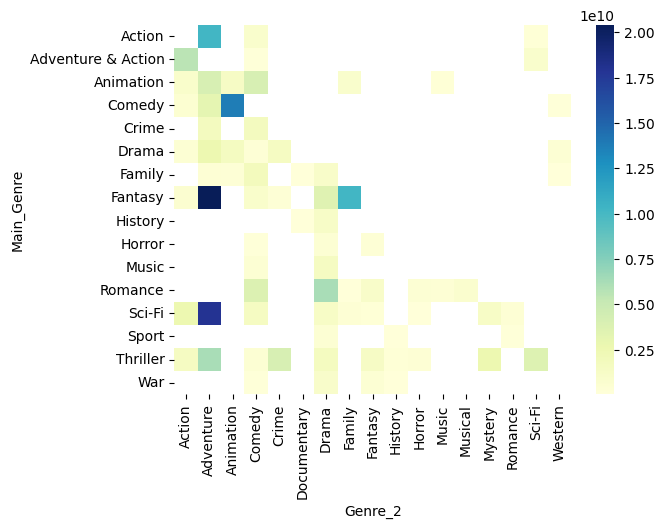

In [56]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
temp = pd.crosstab(movies["Main_Genre"], movies["Genre_2"], movies["worldwide_gross"], aggfunc=sum)
sns.heatmap(temp, cmap="YlGnBu")
